In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
from sklearn import svm

In [69]:
def plotData(x,y):
    pos_examples=x[np.where(y==1)]
    neg_examples=x[np.where(y==0)]
    plt.figure()
    plt.plot(pos_examples[:,0],pos_examples[:,1],"k+")
    plt.plot(neg_examples[:,0],neg_examples[:,1],"yo")
    

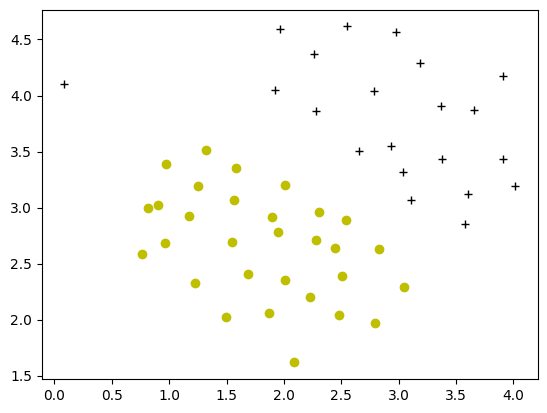

In [77]:
#Loading and Visualizing Dataset 1 
data = scio.loadmat('ex6data1.mat')
x = data['X']
y = data['y'].flatten()
m = y.size
plotData(x,y)

In [71]:
def visualize_boundary(clf, X, x_min, x_max, y_min, y_max):
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='b')


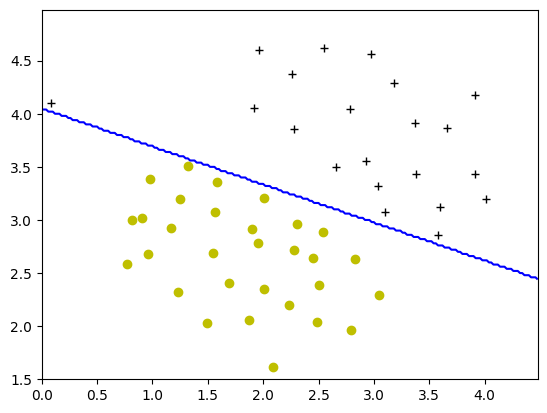

In [72]:
c = 1000
clf = svm.SVC(C=c, kernel='linear', tol=1e-3)
clf.fit(x, y)

plotData(x, y)
visualize_boundary(clf, x, 0, 4.5, 1.5, 5)

In [76]:
#Implementing Gaussian Kernel
def gaussian_kernel(x1,x2,sigma):
    x1=x1.flatten()
    x2=x2.flatten()
    norm=np.linalg.norm(x1-x2)
    sim=np.exp(-(norm**2)/(2*sigma**2))
    return  sim
    

In [74]:
#Evaluating the Gaussian Kernel
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussian_kernel(x1, x2, sigma)
sim

np.float64(0.32465246735834974)

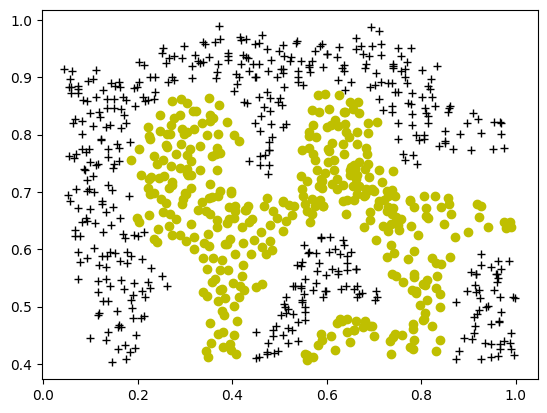

In [78]:
#Loading and Visualizing Dataset 2 
data = scio.loadmat('ex6data2.mat')
x = data['X']
y = data['y'].flatten()
m = y.size
plotData(x,y)

In [80]:
def gaussian_kernel_matrix(x_1, x_2):
    n1 = x_1.shape[0]
    n2 = x_2.shape[0]
    result = np.zeros((n1, n2))

    for i in range(n1):
        for j in range(n2):
            result[i, j] = gaussian_kernel(x_1[i], x_2[j], sigma)

    return result

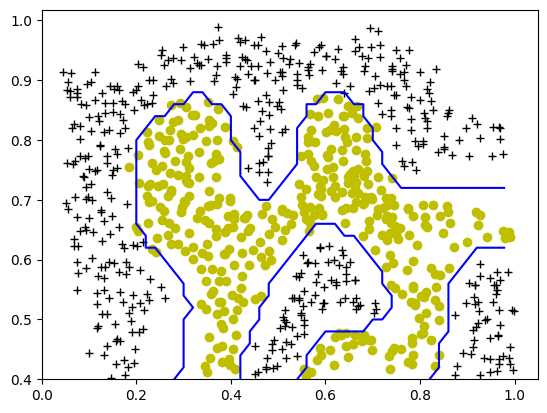

In [84]:
#Training SVM with RBF Kernel (Dataset 2)
c = 1
sigma = 0.1
clf = svm.SVC(C=c, kernel='rbf', gamma=np.power(sigma, -2))
clf.fit(x, y)
plotData(x, y)
visualize_boundary(clf, x, 0, 1, .4, 1.0)

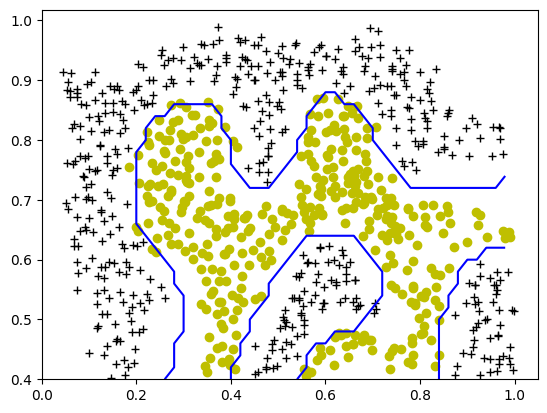

In [86]:
#Training SVM with impelemented  gaussian Kernel (Dataset 2)
c = 1
sigma = 0.1
clf = svm.SVC(C=c, kernel=gaussian_kernel_matrix)
clf.fit(x, y)
plotData(x, y)
visualize_boundary(clf, x, 0, 1, .4, 1.0)